In [1]:
# .\venv\Scripts\Activate
'''Exploratory Data Analysis'''

'Exploratory Data Analysis'

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Load and overview

df = pd.read_csv('../data/raw/PJME_hourly.csv')
df.info()
df.describe()
df['PJME_MW'].describe()
df.head(5)



<class 'pandas.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  str    
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), str(1)
memory usage: 2.2 MB


,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


<Axes: title={'center': 'Energy Consumption over Time'}, xlabel='Datetime'>

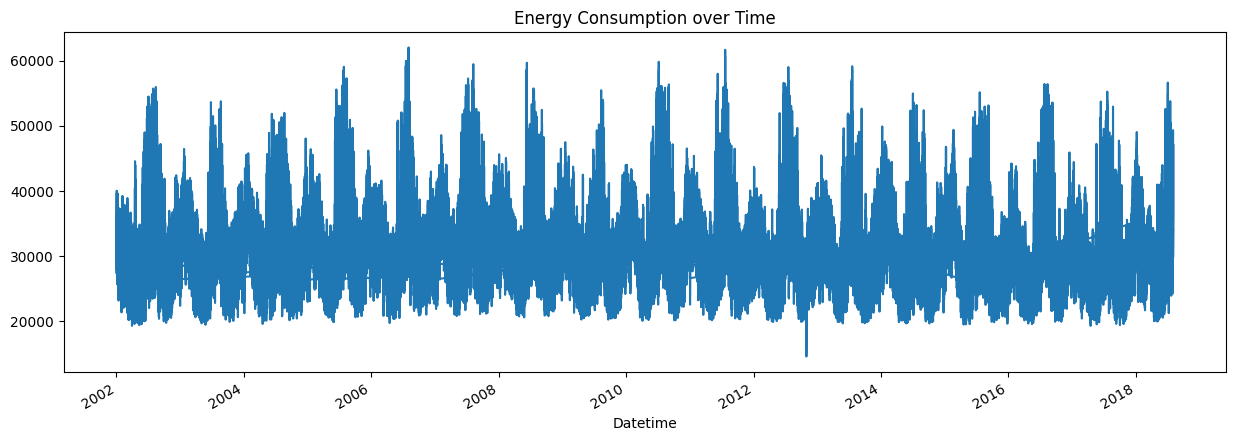

In [3]:
# temporal analysis

df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

# plot series
df['PJME_MW'].plot(figsize=(15,5), title='Energy Consumption over Time')

In [4]:
# Seasonality

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['PJME_MW'], model='additive', period=24*7)
# decomposition.plot()

<Axes: >

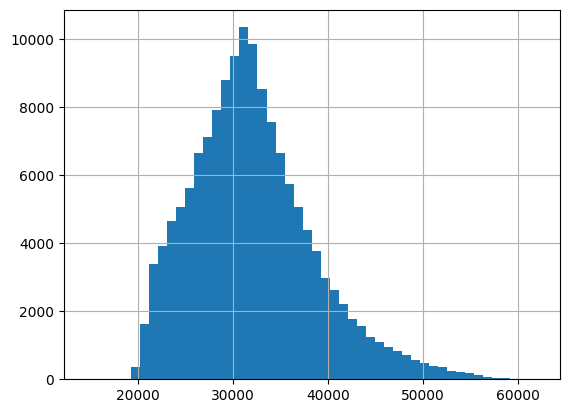

In [5]:
# Distribution
df['PJME_MW'].hist(bins=50)

In [6]:
# Missing Values
df.isnull().sum()

PJME_MW    0
dtype: int64

In [8]:
# Outliers (IQR method)
q1 = df['PJME_MW'].quantile(0.25)
q3 = df['PJME_MW'].quantile(0.75)
IQR = q3-q1
outliers = df[(df['PJME_MW'] < q1-1.5*IQR ) | (df['PJME_MW'] < q3-1.5*IQR )]
print(f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)')

Outliers: 11434 (7.87%)


<Axes: xlabel='hour'>

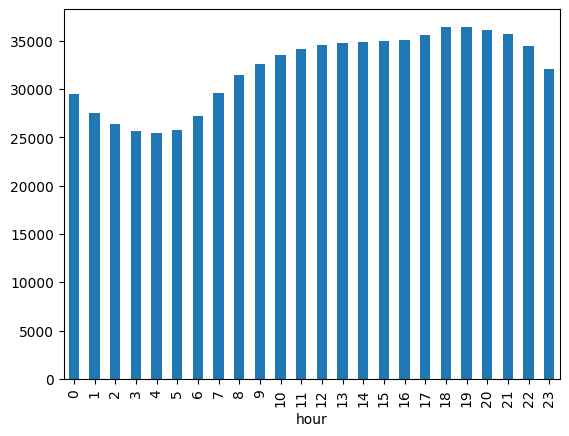

In [10]:
# Patterns

# by time of the day
df['hour'] = df.index.hour
df.groupby('hour')['PJME_MW'].mean().plot(kind='bar')


In [17]:
# # by day of the week
# df['dayofweek'] = df.index.dayofweek
# df.groupby('dayofweek')['PJME_MW'].mean().plot(kind='bar')

# df[['PJME_MW']].assign(
#     dow=df.index.dayofweek,
#     name=df.index.day_name()
# ).head(100)



<Axes: xlabel='day_name'>

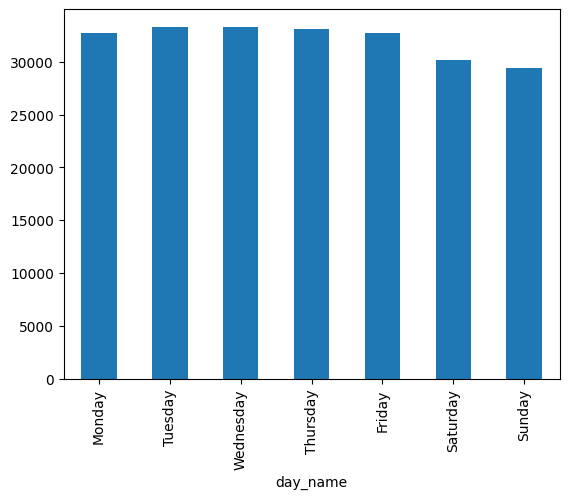

In [14]:
df['day_name'] = df.index.day_name()

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

(
    df.groupby('day_name')['PJME_MW']
      .mean()
      .reindex(order)
      .plot(kind='bar')
)


,PJME_MW,month_num,month_name
Datetime,,,
2002-12-31 01:00:00,26498.0,12,December
2002-12-31 02:00:00,25147.0,12,December
2002-12-31 03:00:00,24574.0,12,December
2002-12-31 04:00:00,24393.0,12,December
2002-12-31 05:00:00,24860.0,12,December


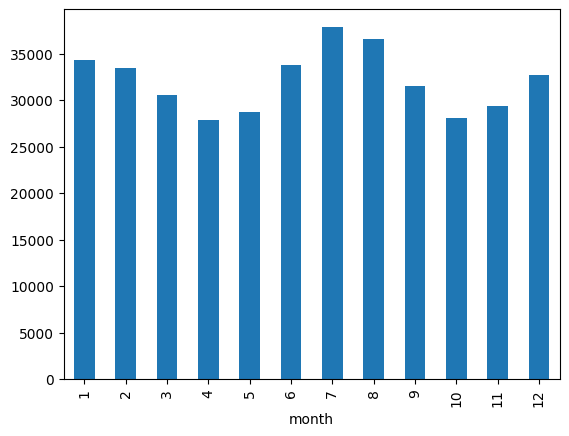

In [ ]:
# by month
df['month'] = df.index.month
df.groupby('month')['PJME_MW'].mean().plot(kind='bar')

# df[['PJME_MW']].assign(
#     month_num=df.index.month,
#     month_name=df.index.month_name()
# ).head()
